# Vistazo a NumPy

https://numpy.org/doc/stable/index.html 

El nombre *NumPy* viene de *Numerical Python*. Esta librería es muy usada porque nos facilita el trabajar con vectores y matrices, y al mismo tiempo nos da muchas herramientas útiles para trabajar con métodos numéricos.

Empezaremos viendo el aspecto más relevante de numpy, las `arrays`, una nueva estructura de datos que a primera vista es muy parecida a las listas de python.

## Arrays

Los *arrays* o *arreglos* son una estructura de dato mucho más eficiente que las listas. Tienen algunas limitaciones, como que cada array solo admite un tipo de dato, o que en principio el tamaño de un array es fijo, pero a cambio vamos a poder escribir un código más compacto y eficiente.

Para crear un array podemos usar la función `array` de numpy, pasandole una lista:

In [6]:
import numpy as np

# primero creamos una lista
lista = [1, 2, 3, 4, 5]
# luego creamos un array a partir de esa lista
array = np.array(lista)

# imprimamos la lista y el array, y veamos el tipo de dato
print(lista, "tipo:", type(lista))
print(array, "tipo:", type(array))

[1, 2, 3, 4, 5] tipo: <class 'list'>
[1 2 3 4 5] tipo: <class 'numpy.ndarray'>


Al imprimir la array vemos que no parece muy diferente a una lista, pero ahora veamos como podemos beneficiarnos del uso de arrays.

Supongamos que tengo dos listas del mismo tamaño ($n$), `lista_1` y `lista_2`:

$$
lista\_1 = [u_1, u_2, ... , u_n] \\
lista\_2 = [v_1, v_", ..., v_n]
$$

 y quiero realizar las siguientes operaciones:

* multiplicar una de las listas por un valor escalar $\lambda$:
  $$ \lambda \cdot lista\_1 =  [\lambda u_1, \lambda u_2, ... , \lambda u_n]$$
* sumar un escalar $\lambda$ a cada elemento de una lista:
  $$ \lambda + lista\_1 =  [\lambda +u_1, \lambda +u_2, ... , \lambda +u_n]$$
* Sumar (o restar) elemento a elemento:
  $$ lista\_1 +  lista\_2 =  [u_1 + v_1, u_2 + v_2, ... , u_n + v_n]$$
* multiplicar (o dividir) elemento a elemento:
  $$ lista\_1 *  lista\_2 =  [u_1 \cdot v_1, u_2 \cdot v_2, ... , u_n \cdot v_n]$$

En todos estos casos deberiamos usar un bucle

In [18]:
# parto de que tengo dos listas
lista_1 = [1, 2, 3]
lista_2 = [2, 0, 2]

# si quiero multiplicar cada elemento de una lista por un escalar:
escalar = 5

# no voy a obtener el resultado que me gustaría
print("lista_1 * 5 =", lista_1*5) 

# Si quiero sumar elemento por elemento, podría probar:
print("lista_1 + lista_2 =", lista_1+lista_2)
# pero el resultado es una concatenación

lista_1 * 5 = [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]
lista_1 + lista_2 = [1, 2, 3, 2, 0, 2]


Ahora, si usamos arrays, podemos hacer todas estas operaciones simplemente usando los operadores aritmeticos:

In [20]:
vector_1 = np.array([1, 2, 3])
vector_2 = np.array([2, 0, 2])

print(f"2*vector_1 = {2*vector_1}")
print(f"vector_1 + 1 = {vector_1 + 1}")
print(f"vector_1 + vector_2 = {vector_1 + vector_2}")
print(f"vector_1 - vector_2 = {vector_1 - vector_2}")
print(f"vector_1 * vector_2 = {vector_1 * vector_2}")

2*vector_1 = [2 4 6]
vector_1 + 1 = [2 3 4]
vector_1 + vector_2 = [3 2 5]
vector_1 * vector_2 = [2 0 6]


Incluso puedo aplicar una función general a un array!

Por ejemplo, la función seno:

In [21]:
array = np.array([1, 2, 3, 4, 5])
print("sin(array) =", np.sin(array))

sin(array) = [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]


### Detalle:
Cuando importamos `numpy` no necesitamos importar la librería `math`, ya que tenemos las mismas funciones y más (aunque algunas funcionan ligeramente diferente)

## Funciones Útiles de NumPy

* `linspace(start, stop, num)` : nos permite crear un array de tamaño `num` entre el rango `start` - `stop`.
* `arange(start, stop, step)` : como `range()` convencional, pero podemos usar un paso decimal, y devuelve un array.
* `ones(shape)` : devuelve un array con unos de tamaño `shape` (puede tener más de una dimensión)
* `zeros(shape)` : similar a `ones` pero con ceros.

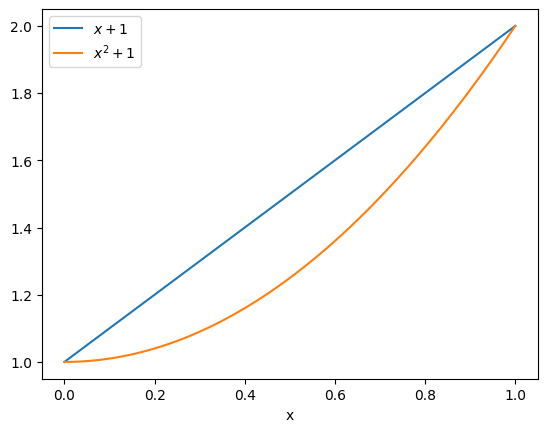

In [77]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, num=100)
x2 = x**2 + 1   # x2 es un array ya que se define en función de x

plt.plot(x, x + 1, label=r"$x + 1$")
plt.plot(x, x2, label=r"$x^2 + 1$")
plt.xlabel("x")
plt.legend()

## NumPy Random

NumPy viene con su propio módulo para generar números pseudoleatorios.

* `randint(low, high, size)` : devuelve un array de tamaño `size`, con enteros aleatorios en el rango semiabierto [`low`, `high`)
* `normal(loc, scale, size)` : devuelve un array de tamaño `size`, siguiendo una distribución normal $\sigma =$`loc` y $\sigma = $`scale`.

(array([149., 163., 178., 151., 176., 183.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

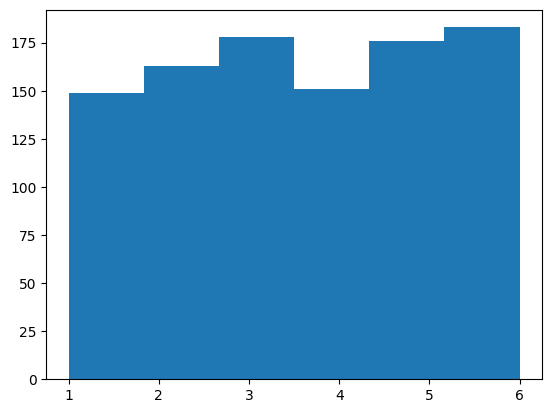

In [32]:
from numpy import random

tiradas = random.randint(1, 7, size=1000)
plt.hist(tiradas, bins = 6)

(array([  6.,  19.,  65., 137., 204., 212., 182., 111.,  48.,  16.]),
 array([-3.09248782, -2.51663823, -1.94078863, -1.36493904, -0.78908944,
        -0.21323984,  0.36260975,  0.93845935,  1.51430894,  2.09015854,
         2.66600814]),
 <BarContainer object of 10 artists>)

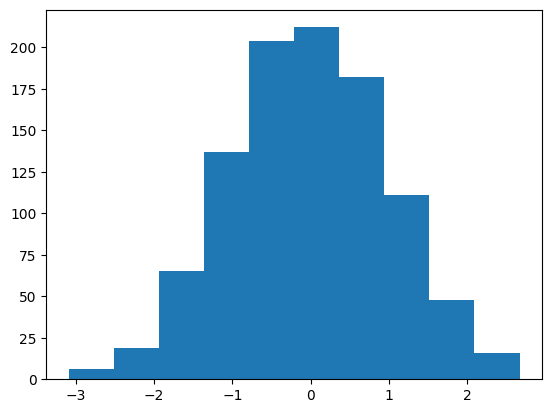

In [38]:
normal = random.normal(0, 1, size=1000)
plt.hist(normal)

(array([ 28.,  51., 103., 108., 137., 168., 126.,  97.,  93.,  58.,  31.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

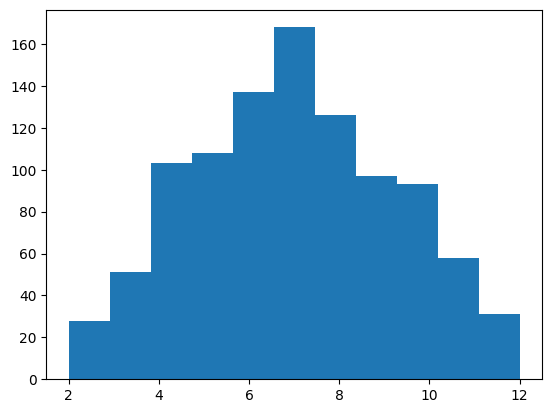

In [42]:
# La suma de dos dados:
tiradas1 = random.randint(1, 7, size=1000)
tiradas2 = random.randint(1, 7, size=1000)

plt.hist(tiradas1 + tiradas2, bins = 11)

## Matrices ... o 2D arrays

Un array puede tener más de una dimensión, y podemos pensar a un array de dos dimenciones (2D array) como una matriz.

In [64]:
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])


print("matriz :\n", matriz, "\n")
# Accediendo a los elementos:
print("matriz[0] =", matriz[0])         # fila 0
print("matriz[-1] =", matriz[-1])       # fila -1
print("matriz[0, 1] =", matriz[0, 1])   # elemento de la fila 0, columna 1
print("matriz[:, 1] =", matriz[:, 1])   # todas las filas, columna 1

matriz :
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

matriz[0] = [1 2 3]
matriz[-1] = [7 8 9]
matriz[0, 1] = 2
matriz[:, 1] = [2 5 8]


También podemos generar un array 2D pasando un tamaño (`size`) de dos dimensiones:

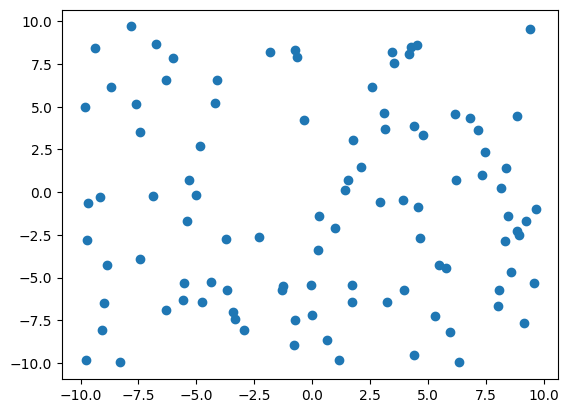

In [65]:
N = 100
puntos_random = random.uniform(-10, 10, size=(N, 2))
plt.scatter(puntos_random[:, 0], puntos_random[:, 1])

## Producto de Matrices

Podemos usar la función `dot` de NumPy para realizar un producto matricial

In [70]:
A = np.array([[1, 0, 1],
              [2, 3, 6],
              [5, 6, 4]])

B = np.array([[2, 0, 0],
              [0, 2, 0],
              [0, 0, 2]])

np.dot(A, B)

array([[ 2,  0,  2],
       [ 4,  6, 12],
       [10, 12,  8]])

## Métodos y Atributos de los Arrays

Podemos ver el tamaño de un array con la propiedad (o atributo) `.size`, y la forma con la propiedad (o atributo) `.shape`. La forma nos servirá cuando trabajemos con arrays de más de una dimensión. Para saber la dimensión de un array podemos usar `.ndim`

Por ejemplo, un array con 2 filas y 3 columnas tendrá un tamaño de `6` y una forma `(2, 3)`.

Dos métodos bastante útiles cuando trabajamos con muestras o mediciones son `.mean()` y `.std()` que nos devuelven la media y la desviación estandar muestral, respectivamente. Por último `.sum()` nos devuelve la suma de todos los elementos de un array.

* Nota: los métodos son funciones por lo tanto llevan paréntesis, a diferencia de los atributos o propiedades.

In [18]:
import numpy as np

array = np.random.uniform(2, 10, 1000)
matriz = np.random.normal(size=(8, 6))

print("\tArray 1D:")
# Tamaño del array
print(f"Tamaño: {array.size}")
# Forma del array
print(f"Tamaño: {array.shape}")
# Media muestral
print(f"Media muestral: {array.mean()}")
# Desviación Estandar Muestral:
print(f"Desviación Estandar: {array.std()}")
# Suma:
print(f"Suma de los elementos: {array.sum()}")

print("\tArray 2D:")
print(f"Tamaño: {matriz.size}")
print(f"Forma: {matriz.shape}")
print(f"Media Muestra: {matriz.mean()}")
print(f"Desviación Estandar: {matriz.std()}")

	Array 1D:
Tamaño: 1000
Tamaño: (1000,)
Media muestral: 5.954948744031249
Desviación Estandar: 2.286161171414272
Suma de los elementos: 5954.948744031249
	Array 2D:
Tamaño: 48
Forma: (8, 6)
Media Muestra: -0.02727950711280336
Desviación Estandar: 0.8977313130251728


En el caso de los arrays de 2 o más dimensiones, podemos aplicar estos métodos por filas o columnas.



In [16]:
matriz = np.random.normal(size=(2, 4))

print("\tPor Filas (resultado en tamaño columnas):")

print(f"Media Muestral: {matriz.mean(axis=0)}")
print(f"Desviación Estandar: {matriz.std(axis=0)}")

print("\n\tPor columnas (resultado en tamaño filas):")

print(f"Media Muestral: {matriz.mean(axis=1)}")
print(f"Desviación Estandar: {matriz.std(axis=1)}")

	Por Filas (resultado en tamaño columnas):
Media Muestral: [-0.2004587   1.15107018  0.10889073  0.20832338]
Desviación Estandar: [0.28827659 0.27817827 0.45676832 0.40139676]

	Por columnas (resultado en tamaño filas):
Media Muestral: [0.1614998 0.472413 ]
Desviación Estandar: [0.5893325  0.61542961]


Una propiedad útil para las matrices es `.T`, que nos permite ver la matriz traspuesta.

In [20]:
M = np.array([[1, 2, 3], 
             [4, 5, 6],
             [7, 8, 9]])

print(M.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


### Lista con atributos y métodos

#### Atributos

* `T` : array traspuesta.
* `ndim` : dimensión del array.
* `size` : tamaño del array.
* `shape` : forma del array.

#### Métodos

* `argmax()` : Índice o índices del máximo valor en el array.
* `argmin()` : Índice o índices del mínimo valor en el array.
* `max()` : Máximo valor del array.
* `mean()` : Media muestral del array.
* `min()` : Mínimo valor del array.
* `reshape()` : Devuelve un array con la forma especificada.
* `sum()` : Suma de los elementos del array.
* `std()` : Desvuación Estandar Muestral.
* `var()` : Varianza Muestral.


Pueden ver una lista completa de atributos y métodos aquí:
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html 